**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from math import sqrt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import GridSearchCV

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

**Reading the dataset**

In [2]:
rems_df = pd.read_csv('/content/Gale_Crater.csv')
rems_df.head()

,Sol_number,Earth_Date,Mars_Date,Longitude,Mars_Year,Season,Max_Ground_Temp,Min_Ground_Temp,Mean_Ground_Temp,Max_Air_Temp,...,Mean_Pressure,Max_Humidity,Max_UV_Flux,Max_Reflected_Solar_Radiation,Max_Downwelling_Solar_Radiation,Albedo,Pressure_Drop,Dust_Activity,Count_Dust_Activity,Optical_Depth
0,10,16-08-2012,Month 6,155,Year 31,Summer,-16.0,-75.0,-46.5471,8.0,...,739.3465,33.45,19.703081,92.480003,544.000000,0.17,0.64,Dust vortices,1.0,0.6422
1,11,17-08-2012,Month 6,156,Year 31,Summer,-11.0,-76.0,NaN,9.0,...,NaN,31.41,19.392178,NaN,535.299988,NaN,NaN,no activity,NaN,0.6676
2,12,18-08-2012,Month 6,156,Year 31,Summer,-18.0,-76.0,-46.4798,8.0,...,740.6138,30.75,19.341173,NaN,533.900024,NaN,NaN,no activity,NaN,0.6838
3,13,19-08-2012,Month 6,157,Year 31,Summer,-15.0,-74.0,NaN,8.0,...,NaN,NaN,18.328314,NaN,NaN,NaN,NaN,no activity,NaN,0.6820
4,14,20-08-2012,Month 6,157,Year 31,Summer,-16.0,-74.0,NaN,9.0,...,739.4538,24.79,19.228796,95.526001,530.700012,0.18,NaN,no activity,NaN,0.7055


In [3]:
rems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sol_number                       2361 non-null   int64  
 1   Earth_Date                       2361 non-null   object 
 2   Mars_Date                        2361 non-null   object 
 3   Longitude                        2361 non-null   int64  
 4   Mars_Year                        2361 non-null   object 
 5   Season                           2361 non-null   object 
 6   Max_Ground_Temp                  2336 non-null   float64
 7   Min_Ground_Temp                  2336 non-null   float64
 8   Mean_Ground_Temp                 1688 non-null   float64
 9   Max_Air_Temp                     2336 non-null   float64
 10  Min_Air_Temp                     2336 non-null   float64
 11  Mean_Air_Temp                    2184 non-null   float64
 12  Max_Wind_Speed      

**Data Preprocessing**

In [4]:
rems_df['Earth_Date'] = pd.to_datetime(rems_df['Earth_Date'] , format='%d-%m-%Y')
rems_df['Earth_Date']  = rems_df['Earth_Date'] .dt.strftime('%Y-%m-%d')
rems_df['Earth_Date'] = pd.to_datetime(rems_df['Earth_Date'])

In [5]:
rems_df = rems_df.set_index('Earth_Date')

In [6]:
rems_df.describe()

,Sol_number,Longitude,Max_Ground_Temp,Min_Ground_Temp,Mean_Ground_Temp,Max_Air_Temp,Min_Air_Temp,Mean_Air_Temp,Max_Wind_Speed,Mean_Pressure,Max_Humidity,Max_UV_Flux,Max_Reflected_Solar_Radiation,Max_Downwelling_Solar_Radiation,Albedo,Pressure_Drop,Count_Dust_Activity,Optical_Depth
count,2361.000000,2361.000000,2336.000000,2336.000000,1688.000000,2336.000000,2336.000000,2184.000000,2361.000000,1915.000000,2056.000000,2251.000000,2023.000000,2149.000000,2054.000000,1123.000000,1123.000000,1679.000000
mean,1253.092757,170.534096,-12.807791,-75.386558,-47.067634,2.024401,-79.988014,-50.449110,4.832799,837.999691,23.080161,17.289766,90.423299,487.969698,0.186271,0.811044,1.968833,0.889513
std,709.393093,106.664188,10.479279,5.625498,7.252477,8.905442,9.170936,7.087898,0.746417,54.704775,14.519760,3.030210,24.846255,68.147791,0.041453,0.427620,1.402795,0.796598
min,10.000000,0.000000,-35.000000,-90.000000,-64.202500,-61.000000,-136.000000,-64.976000,3.254300,714.952500,3.780000,0.758410,23.572500,87.330002,0.060000,0.492500,1.000000,0.229000
25%,651.000000,74.000000,-23.000000,-79.000000,-53.848650,-5.000000,-85.000000,-56.826525,4.274700,802.051900,11.850000,16.270585,73.593502,449.000000,0.165000,0.560000,1.000000,0.570900
50%,1253.000000,166.000000,-12.000000,-75.000000,-44.937800,3.000000,-79.000000,-48.671400,4.827600,850.862600,19.165000,17.355453,90.265999,485.700012,0.190000,0.670000,1.000000,0.747400
75%,1856.000000,261.000000,-4.000000,-71.000000,-40.736925,9.000000,-74.000000,-44.399625,5.281100,878.913350,29.702500,18.787143,108.191002,532.900024,0.210000,0.890000,2.000000,0.964050
max,2500.000000,359.000000,11.000000,-56.000000,-35.406400,24.000000,-8.000000,-38.802200,7.238800,934.730000,83.630000,24.114000,155.652008,654.400024,0.290000,5.440000,10.000000,7.893333


In [7]:
rems_df.isnull().sum()

Sol_number                            0
Mars_Date                             0
Longitude                             0
Mars_Year                             0
Season                                0
Max_Ground_Temp                      25
Min_Ground_Temp                      25
Mean_Ground_Temp                    673
Max_Air_Temp                         25
Min_Air_Temp                         25
Mean_Air_Temp                       177
Max_Wind_Speed                        0
Mean_Pressure                       446
Max_Humidity                        305
Max_UV_Flux                         110
Max_Reflected_Solar_Radiation       338
Max_Downwelling_Solar_Radiation     212
Albedo                              307
Pressure_Drop                      1238
Dust_Activity                         0
Count_Dust_Activity                1238
Optical_Depth                       682
dtype: int64

In [8]:
columns = ['Max_Ground_Temp', 'Min_Ground_Temp',
       'Mean_Ground_Temp', 'Max_Air_Temp', 'Min_Air_Temp', 'Mean_Air_Temp',
       'Max_Wind_Speed', 'Mean_Pressure', 'Max_Humidity', 'Max_UV_Flux',
       'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation',
       'Albedo', 'Optical_Depth']

rems_df[columns] = rems_df[columns].fillna(rems_df[columns].rolling(10, min_periods=1).mean())
rems_df[columns] = rems_df[columns].interpolate()

In [9]:
rems_df[['Max_Air_Temp', 'Min_Air_Temp', 'Max_Ground_Temp', 'Min_Ground_Temp', 'Mean_Ground_Temp', 'Mean_Air_Temp']] = rems_df[['Max_Air_Temp', 'Min_Air_Temp', 'Max_Ground_Temp', 'Min_Ground_Temp', 'Mean_Ground_Temp', 'Mean_Air_Temp']].round()
rems_df[['Max_Humidity', 'Max_Wind_Speed', 'Mean_Pressure', 'Max_UV_Flux', 'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation', 'Albedo', 'Pressure_Drop', 'Optical_Depth']] = rems_df[['Max_Humidity', 'Max_Wind_Speed', 'Mean_Pressure', 'Max_UV_Flux', 'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation', 'Albedo', 'Pressure_Drop', 'Optical_Depth']].round(2)

In [10]:
#Fillna
fill_columns = ['Count_Dust_Activity']
rems_df[fill_columns] = rems_df[fill_columns].fillna(0)

In [11]:
def fillna_random(val):
    if pd.isna(val):
        return np.random.uniform(0, 0.49)
    else:
        return val
# apply the function to the column with NaN values
rems_df['Pressure_Drop'] = rems_df['Pressure_Drop'].apply(fillna_random)

In [12]:
rems_df.isnull().sum()

Sol_number                         0
Mars_Date                          0
Longitude                          0
Mars_Year                          0
Season                             0
Max_Ground_Temp                    0
Min_Ground_Temp                    0
Mean_Ground_Temp                   0
Max_Air_Temp                       0
Min_Air_Temp                       0
Mean_Air_Temp                      0
Max_Wind_Speed                     0
Mean_Pressure                      0
Max_Humidity                       0
Max_UV_Flux                        0
Max_Reflected_Solar_Radiation      0
Max_Downwelling_Solar_Radiation    0
Albedo                             0
Pressure_Drop                      0
Dust_Activity                      0
Count_Dust_Activity                0
Optical_Depth                      0
dtype: int64

**Exploratory Data Analysis**

array([<Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>],
      dtype=object)

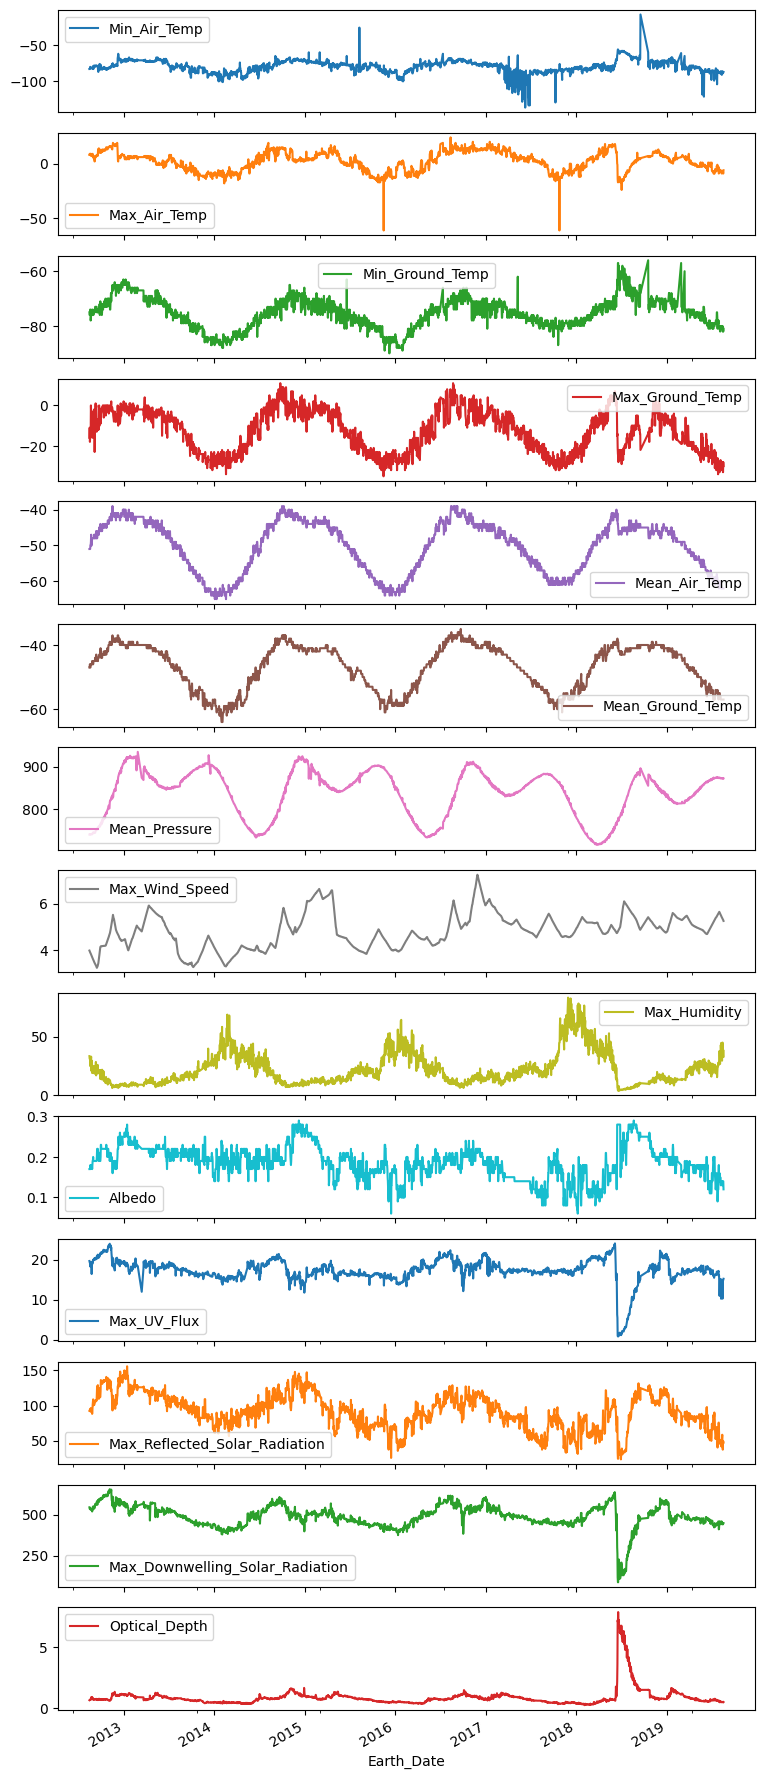

In [13]:
data = rems_df[['Min_Air_Temp', 'Max_Air_Temp', 'Min_Ground_Temp', 'Max_Ground_Temp', 'Mean_Air_Temp', 'Mean_Ground_Temp', 'Mean_Pressure', 'Max_Wind_Speed', 'Max_Humidity', 'Albedo', 'Max_UV_Flux',
                'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation', 'Optical_Depth']]
data.plot(subplots=True, figsize=(9,25))

<ipython-input-14-e6ea45abfb30>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rems_df_2018 = rems_df['2018']


array([<Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>,
       <Axes: xlabel='Earth_Date'>], dtype=object)

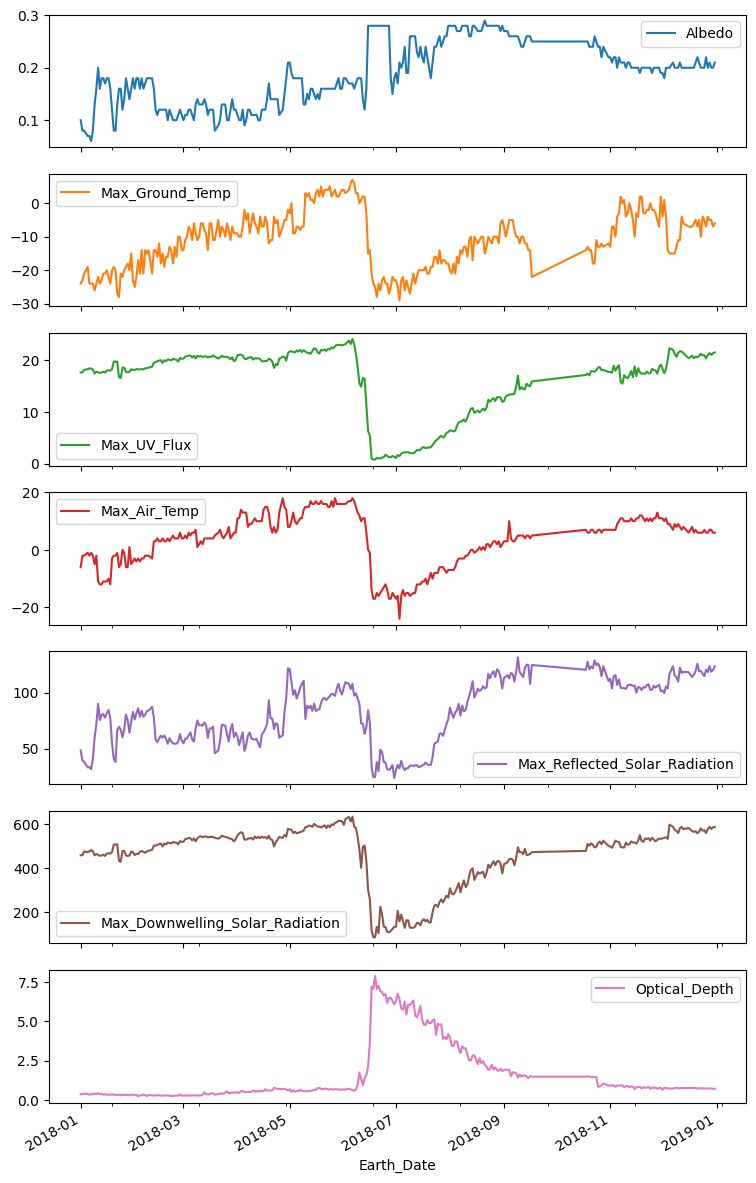

In [14]:
#Dust Storm Year
rems_df_2018 = rems_df['2018']
data = rems_df_2018[['Albedo', 'Max_Ground_Temp', 'Max_UV_Flux', 'Max_Air_Temp',
                     'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation', 'Optical_Depth']]
data.plot(subplots=True, figsize=(9,16))

<ipython-input-15-0b089de85796>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-15-0b089de85796>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


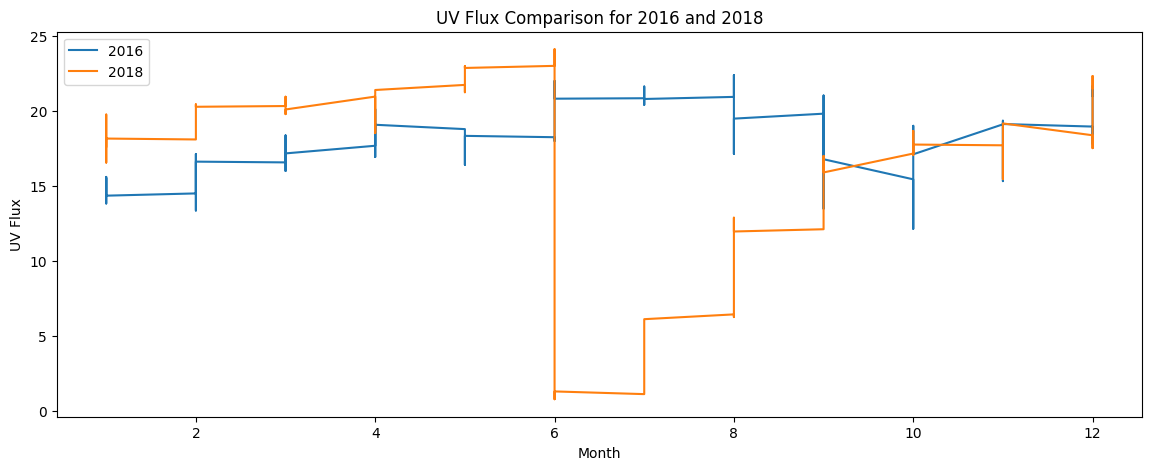

In [15]:
#Comparison Plot
df = rems_df[rems_df.index.year.isin([2016, 2018])]

# Create a new column for the month
df['month'] = df.index.month
# Create a new column for the year
df['year'] = df.index.year

# Create a line plot with the x-axis as the month and the y-axis as the UV Flux value
fig, ax = plt.subplots()
for year, group in df.groupby('year'):
    group.plot(x='month', y='Max_UV_Flux', ax=ax, label=year, kind='line',figsize=(14,5))

# Set the title and axis labels
ax.set_title('UV Flux Comparison for 2016 and 2018')
ax.set_xlabel('Month')
ax.set_ylabel('UV Flux')

# Show the figure
plt.show()

<ipython-input-16-59f62df74490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-16-59f62df74490>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


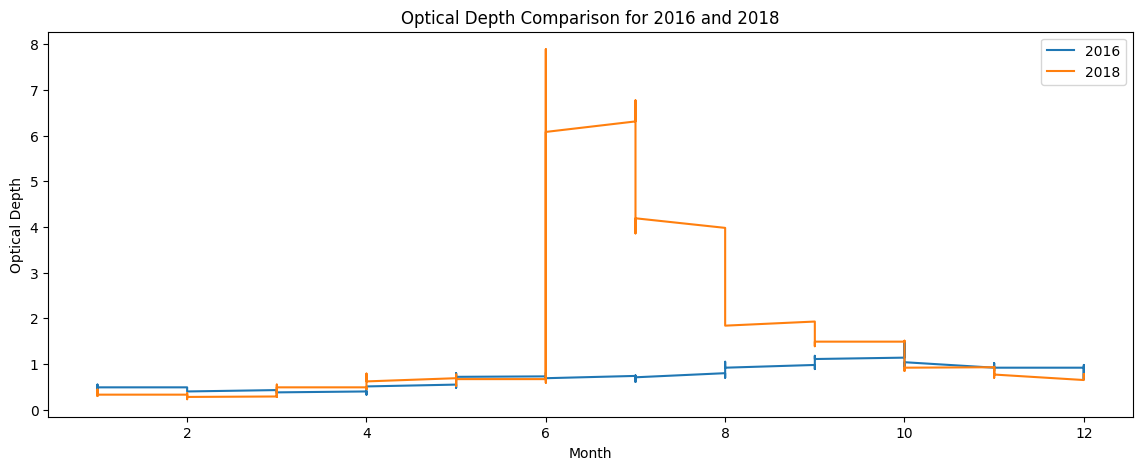

In [16]:
#Comparison Plot
df = rems_df[rems_df.index.year.isin([2016, 2018])]

# Create a new column for the month
df['month'] = df.index.month
# Create a new column for the year
df['year'] = df.index.year

# Create a line plot with the x-axis as the month and the y-axis as the Optical Depth value
fig, ax = plt.subplots()
for year, group in df.groupby('year'):
    group.plot(x='month', y='Optical_Depth', ax=ax, label=year, kind='line',figsize=(14,5))

# Set the title and axis labels
ax.set_title('Optical Depth Comparison for 2016 and 2018')
ax.set_xlabel('Month')
ax.set_ylabel('Optical Depth')

# Show the figure
plt.show()

In [17]:
#Monthly Comparison UV and Maximum Optical Depth between years
rems_df['month'] = rems_df.index.month
rems_df['2018'][['month','Max_UV_Flux','Optical_Depth']].groupby('month').agg({'Max_UV_Flux':['min','max'], 'Optical_Depth':['min','max']})

<ipython-input-17-eb1ba411147f>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rems_df['2018'][['month','Max_UV_Flux','Optical_Depth']].groupby('month').agg({'Max_UV_Flux':['min','max'], 'Optical_Depth':['min','max']})


Max_UV_Flux        Optical_Depth      
              min    max           min   max
month                                       
1           16.55  19.75          0.30  0.44
2           18.09  20.43          0.23  0.36
3           19.78  20.94          0.28  0.55
4           18.52  21.39          0.45  0.79
5           21.24  22.98          0.52  0.77
6            0.76  24.11          0.59  7.89
7            1.10   6.10          3.86  6.77
8            6.24  12.87          1.84  3.98
9           12.10  16.99          1.39  1.93
10          17.06  18.66          0.85  1.51
11          15.46  19.16          0.70  0.94
12          17.51  22.32          0.65  0.78

<ipython-input-18-b772f5c8603b>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2018 = rems_df['2018']


array([<Axes: xlabel='Earth_Date'>, <Axes: xlabel='Earth_Date'>],
      dtype=object)

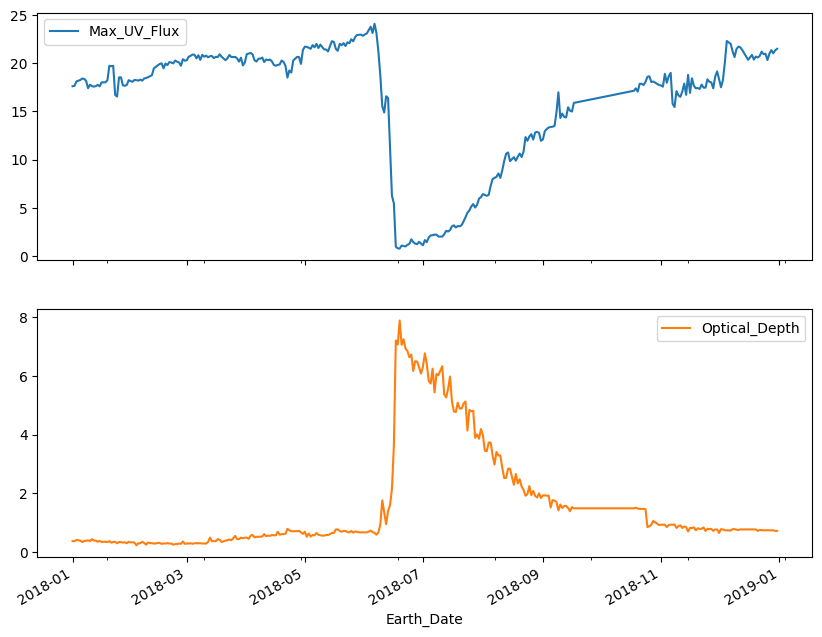

In [18]:
#Comparison plot of Ultraviolet Radiation vs Optical Depth
df_2018 = rems_df['2018']
data_2015 = df_2018[['Max_UV_Flux','Optical_Depth']]
data_2015.plot(subplots=True)

In [19]:
#Correlation between factors
df_corr = rems_df[['Max_Ground_Temp', 'Min_Ground_Temp',
       'Mean_Ground_Temp', 'Max_Air_Temp', 'Min_Air_Temp', 'Mean_Air_Temp',
       'Max_Wind_Speed', 'Mean_Pressure', 'Max_Humidity', 'Max_UV_Flux',
       'Max_Reflected_Solar_Radiation', 'Max_Downwelling_Solar_Radiation',
       'Albedo', 'Optical_Depth']].corr(method='pearson')
df_corr

,Max_Ground_Temp,Min_Ground_Temp,Mean_Ground_Temp,Max_Air_Temp,Min_Air_Temp,Mean_Air_Temp,Max_Wind_Speed,Mean_Pressure,Max_Humidity,Max_UV_Flux,Max_Reflected_Solar_Radiation,Max_Downwelling_Solar_Radiation,Albedo,Optical_Depth
Max_Ground_Temp,1.000000,0.686121,0.876193,0.808326,0.482788,0.907076,0.352486,-0.085408,-0.542381,0.414277,0.684798,0.658901,0.387738,0.094426
Min_Ground_Temp,0.686121,1.000000,0.869772,0.552872,0.680937,0.873245,0.476821,0.043036,-0.646053,-0.025092,0.485822,0.257474,0.470283,0.560071
Mean_Ground_Temp,0.876193,0.869772,1.000000,0.785093,0.650222,0.976950,0.491808,-0.038372,-0.674316,0.227969,0.604058,0.520347,0.411146,0.361336
Max_Air_Temp,0.808326,0.552872,0.785093,1.000000,0.226908,0.776637,0.373411,-0.129985,-0.418449,0.519471,0.479472,0.716303,0.072024,-0.039921
Min_Air_Temp,0.482788,0.680937,0.650222,0.226908,1.000000,0.628634,0.326727,0.057500,-0.500207,-0.127961,0.402255,0.094655,0.507706,0.483337
Mean_Air_Temp,0.907076,0.873245,0.976950,0.776637,0.628634,1.000000,0.464314,-0.043384,-0.671057,0.227097,0.660121,0.521872,0.478671,0.352471
Max_Wind_Speed,0.352486,0.476821,0.491808,0.373411,0.326727,0.464314,1.000000,0.204836,-0.329282,-0.035625,0.141268,0.124596,0.107775,0.248277
Mean_Pressure,-0.085408,0.043036,-0.038372,-0.129985,0.057500,-0.043384,0.204836,1.000000,-0.386656,-0.240951,0.180171,-0.140669,0.282130,0.034931
Max_Humidity,-0.542381,-0.646053,-0.674316,-0.418449,-0.500207,-0.671057,-0.329282,-0.386656,1.000000,0.070775,-0.538532,-0.192687,-0.549138,-0.430017
Max_UV_Flux,0.414277,-0.025092,0.227969,0.519471,-0.127961,0.227097,-0.035625,-0.240951,0.070775,1.000000,0.430863,0.919198,-0.184768,-0.718404


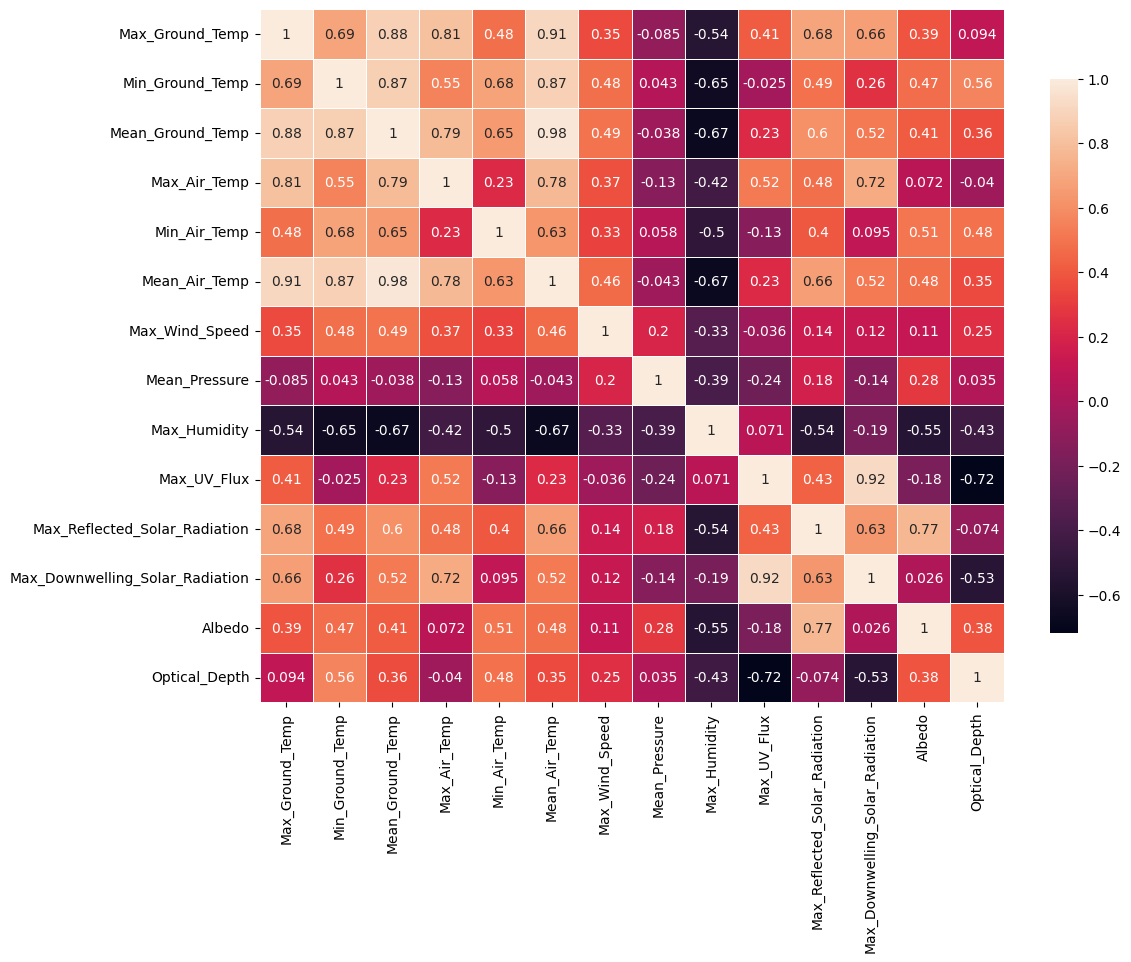

In [20]:
#Heatmap
fig = sns.heatmap(df_corr, linewidths=0.5, cbar_kws={'shrink':0.8}, annot=True)
fig.figure.set_size_inches(12,9)

plt.show()

In [21]:
#UV Plot
import plotly.express as px
fig = px.line(rems_df, x=rems_df.index, y='Max_UV_Flux', title='Ultraviolet Radiation')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [22]:
#Optical Depth plot
import plotly.express as px
fig = px.line(rems_df, x=rems_df.index, y='Optical_Depth', title='Optical Depth')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

**FORECASTING MODEL**

In [23]:
#Input
df_input = rems_df[['Max_UV_Flux', 'Optical_Depth']]

In [24]:
#Splitting the data
test_split = round(len(df_input) * 0.20)
val_split = round(len(df_input) * 0.10)

In [25]:
df_for_training = df_input[:-(test_split + val_split)]
df_for_validation = df_input[-(test_split + val_split):-test_split]
df_for_testing = df_input[-test_split:]

In [26]:
print(df_for_training.shape)
print(df_for_validation.shape)
print(df_for_testing.shape)

(1653, 2)
(236, 2)
(472, 2)


In [27]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_validation_scaled = scaler.transform(df_for_validation)
df_for_testing_scaled = scaler.transform(df_for_testing)

In [28]:
#Preparing data for LSTM Model
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            feature = dataset[i - n_past:i, 0:dataset.shape[1]]
            dataX.append(feature)
            label = [dataset[i,0], dataset[i,1]]
            dataY.append(label)
    return np.array(dataX),np.array(dataY)

In [29]:
#Splitting data into training, validation and testing set
trainX,trainY=createXY(df_for_training_scaled,10)
valX,valY=createXY(df_for_validation_scaled,10)
testX,testY=createXY(df_for_testing_scaled,10)

In [30]:
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)
print(testX.shape)
print(testY.shape)

(1643, 10, 2)
(1643, 2)
(226, 10, 2)
(226, 2)
(462, 10, 2)
(462, 2)


In [31]:
#Model
def build_model(optimizer):
    grid_model =tf.keras.Sequential()
    grid_model.add(tf.keras.layers.LSTM(128,return_sequences=True,input_shape=(10,2)))
    #grid_model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    grid_model.add(tf.keras.layers.LSTM(64, return_sequences=False))
    #grid_model.add(tf.keras.layers.Dropout(0.3))
    grid_model.add(tf.keras.layers.Dense(2))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(valX,valY))
parameters = {'batch_size' : [16,20],
              'epochs' : [10,20],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

<ipython-input-31-48afd660b935>:13: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [32]:
grid_search = grid_search.fit(trainX,trainY)


Epoch 1/10
52/52 [==============================] - 6s 37ms/step - loss: 0.0222 - val_loss: 0.0019
Epoch 2/10
52/52 [==============================] - 1s 20ms/step - loss: 0.0040 - val_loss: 0.0012
Epoch 3/10
52/52 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 4/10
52/52 [==============================] - 1s 20ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 5/10
52/52 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 6/10
52/52 [==============================] - 1s 22ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 7/10
52/52 [==============================] - 2s 30ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 8/10
52/52 [==============================] - 1s 29ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 9/10
52/52 [==============================] - 1s 20ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 10/10
52/52 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 1/10
52/52 [===========

In [33]:
grid_search.best_params_


{'batch_size': 20, 'epochs': 20, 'optimizer': 'adam'}

In [34]:
my_model=grid_search.best_estimator_.model

In [35]:
#Predictions
test_prediction=my_model.predict(testX)
train_prediction = my_model.predict(trainX)
val_prediction=my_model.predict(valX)
print(test_prediction.shape)
print(train_prediction.shape)
print(val_prediction.shape)

8/8 [==============================] - 0s 9ms/step
(462, 2)
(1643, 2)
(226, 2)


In [36]:
#Transforming the scaled predicted values to original values
test_pred = scaler.inverse_transform(test_prediction)
train_pred = scaler.inverse_transform(train_prediction)
val_pred=scaler.inverse_transform(val_prediction)

In [37]:
#Transforming the scaled test, train and validation values to original values
test=scaler.inverse_transform(testY)
train=scaler.inverse_transform(trainY)
val=scaler.inverse_transform(valY)

In [38]:
#Creating a dataframe for train and predicted values
train_results = pd.concat([pd.DataFrame(train[:, 0]), pd.DataFrame(train_pred[:, 0]),
                           pd.DataFrame(train[:, 1]), pd.DataFrame(train_pred[:, 1])], axis=1)
train_results.columns = ['Train_UV', 'Predicted_UV', 'Train_Optical_Depth', 'Predicted_Optical_Depth']
train_results['Earth_Date'] = df_input.iloc[10:len(train) + 10].index
train_results.set_index('Earth_Date', inplace=True)

In [39]:
train_results

,Train_UV,Predicted_UV,Train_Optical_Depth,Predicted_Optical_Depth
Earth_Date,,,,
2012-08-26,18.81,18.234634,0.73,0.851834
2012-08-27,18.81,18.797529,0.89,0.795442
2012-08-28,19.45,18.688498,0.82,0.825876
2012-08-29,19.19,19.160967,0.82,0.814452
2012-08-30,19.88,19.316299,0.72,0.823590
...,...,...,...,...
2017-06-21,17.04,17.631628,0.64,0.752215
2017-06-22,17.02,17.707386,0.70,0.725427
2017-06-23,16.99,17.556927,0.70,0.724918


In [40]:
#Creating a dataframe for validation and predicted values
val_results = pd.concat([pd.DataFrame(val[:, 0]), pd.DataFrame(val_pred[:, 0]),
                         pd.DataFrame(val[:, 1]), pd.DataFrame(val_pred[:, 1])], axis=1)
val_results.columns = ['Val_UV', 'Predicted_UV', 'Val_Optical_Depth', 'Predicted_Optical_Depth']
val_results['Earth_Date'] = df_input.iloc[len(train) + 10:len(train) + len(val) + 10].index
val_results.set_index('Earth_Date', inplace=True)

In [41]:
val_results

,Val_UV,Predicted_UV,Val_Optical_Depth,Predicted_Optical_Depth
Earth_Date,,,,
2017-06-26,16.10,17.346001,0.66,0.683720
2017-06-27,16.63,16.994963,0.63,0.696687
2017-06-28,16.53,17.035347,0.63,0.679277
2017-06-29,16.28,17.015381,0.63,0.668539
2017-06-30,16.39,16.892971,0.63,0.665359
...,...,...,...,...
2018-02-09,20.13,20.006680,0.29,0.341967
2018-02-11,20.09,20.151932,0.29,0.338341
2018-02-12,19.99,20.232534,0.25,0.338226


In [42]:
#Creating a dataframe for test and predicted values
test_results = pd.concat([pd.DataFrame(test[:, 0]), pd.DataFrame(test_pred[:, 0]),
                          pd.DataFrame(test[:, 1]), pd.DataFrame(test_pred[:, 1])], axis=1)
test_results.columns = ['Test_UV', 'Predicted_UV', 'Test_Optical_Depth', 'Predicted_Optical_Depth']
test_results['Earth_Date'] = df_input.iloc[len(train) + len(val) + 30:].index
test_results.set_index('Earth_Date', inplace=True)

In [43]:
test_results

,Test_UV,Predicted_UV,Test_Optical_Depth,Predicted_Optical_Depth
Earth_Date,,,,
2018-03-07,20.84,20.911963,0.30,0.351611
2018-03-08,20.36,20.979883,0.30,0.352228
2018-03-09,20.88,20.848379,0.29,0.361536
2018-03-10,20.69,20.983175,0.29,0.352222
2018-03-11,20.80,20.996759,0.29,0.351146
...,...,...,...,...
2019-08-14,10.25,14.973176,0.49,0.484361
2019-08-15,14.85,13.719658,0.49,0.542031
2019-08-16,14.82,14.024526,0.47,0.508558


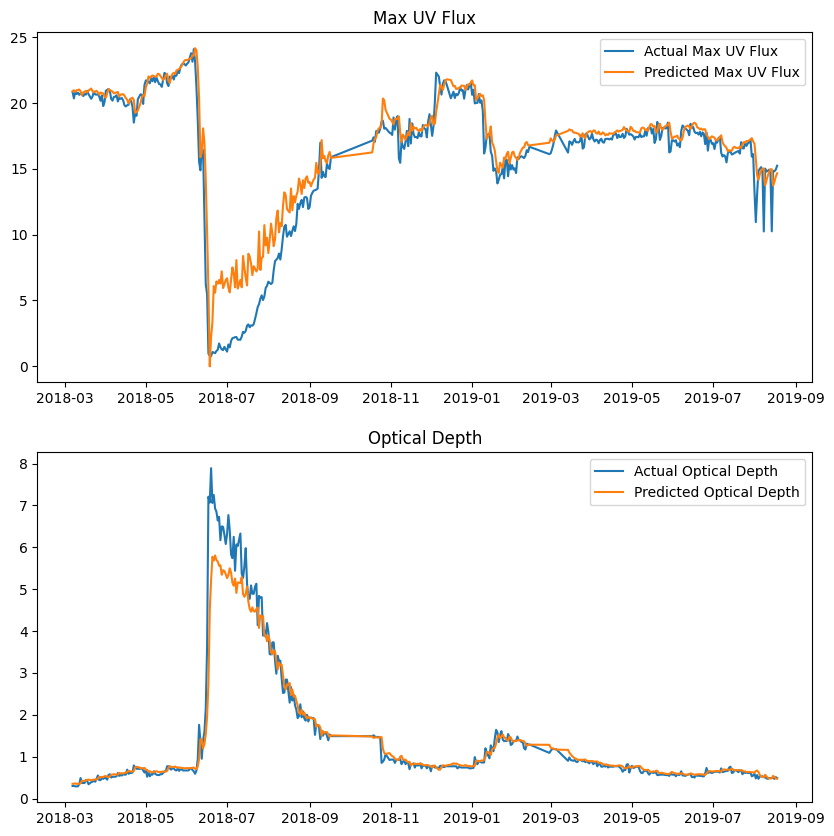

In [44]:
# Plot the predicted and actual values
#UV Flux
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(test_results.index, test_results['Test_UV'], label='Actual Max UV Flux')
ax[0].plot(test_results.index, test_results['Predicted_UV'], label='Predicted Max UV Flux')
ax[0].set_title('Max UV Flux')
ax[0].legend()

#Optical Depth
ax[1].plot(test_results.index, test_results['Test_Optical_Depth'], label='Actual Optical Depth')
ax[1].plot(test_results.index, test_results['Predicted_Optical_Depth'], label='Predicted Optical Depth')
ax[1].set_title('Optical Depth')
ax[1].legend()

**Evaluation Metrics**

In [45]:
#Mean Absolute Error
mae = mean_absolute_error(testY, test_prediction)
print('Mean absolute error:', mae)

Mean absolute error: 0.10369940293847191


In [46]:
#Mean Squared Error
mse = mean_squared_error(testY, test_prediction)
print('Mean squared error:', mse)

Mean squared error: 0.054085191190304534


In [47]:
#Root Mean Squared Error
rmse = sqrt(mean_squared_error(testY, test_prediction))
print('Root Mean squared error:', rmse)

Root Mean squared error: 0.23256223079060911


In [53]:
#R2 Score
print(r2_score(testY, test_prediction))

0.9127771049693173


MAKING FUTURE PREDICTIONS

In [49]:
#Forecasting values for the next 20 days
df_past_20 = df_input.iloc[-20:,:]
df_past_20 = scaler.transform(df_past_20)

In [50]:
def predict_future(model, data, n_future):
    predictions = []
    for i in range(n_future):
        pred = model.predict(data.reshape(1, data.shape[0], data.shape[1]))
        predictions.append(pred)
        data = np.vstack((data[1:], pred))
    return np.array(predictions)

future_predictions = predict_future(my_model, df_past_20, 20)
future_predictions = scaler.inverse_transform(future_predictions.reshape(future_predictions.shape[0], future_predictions.shape[2]))


1/1 [==============================] - 0s 46ms/step


In [51]:
future_dates = pd.date_range(start='2019-08-19', periods=20, freq='D')
future_df = pd.DataFrame(future_predictions)
future_df.columns = ['Future_UV', 'Future_Optical_Depth']
future_df.index = future_dates


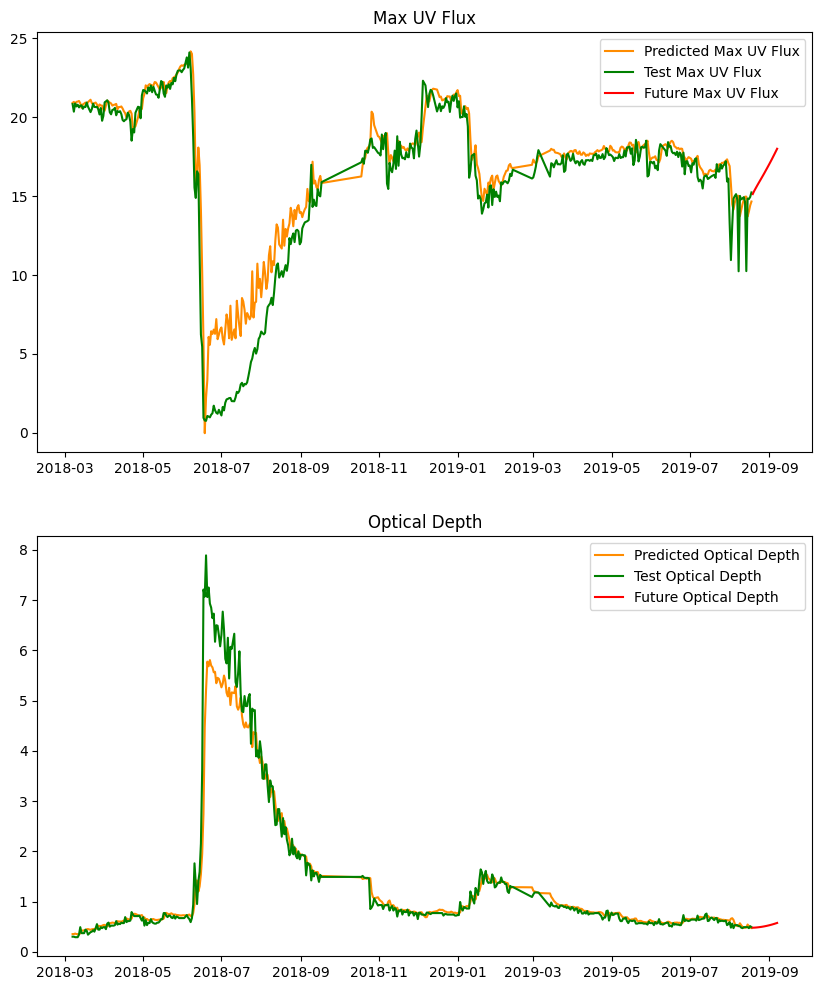

In [52]:
# Plot the predicted, actual, and future values
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax[0].plot(test_results.index, test_results['Predicted_UV'], label='Predicted Max UV Flux', color='darkorange')
ax[0].plot(test_results.index, test_results['Test_UV'], label='Test Max UV Flux', color='green')
ax[0].plot(future_df.index, future_df['Future_UV'], label='Future Max UV Flux', color='red')
ax[0].set_title('Max UV Flux')
ax[0].legend()

ax[1].plot(test_results.index, test_results['Predicted_Optical_Depth'], label='Predicted Optical Depth', color='darkorange')
ax[1].plot(test_results.index, test_results['Test_Optical_Depth'], label='Test Optical Depth', color='green')
ax[1].plot(future_df.index, future_df['Future_Optical_Depth'], label='Future Optical Depth', color='red')
ax[1].set_title('Optical Depth')
ax[1].legend()

plt.show()